In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def dataframe_cleaning(path):

    df = pd.read_excel(path)

    #Non informative columns that won´t be considered in the analysis  
    col_out = ['id', 'db', 'Marca temporal', 'Correo electrónico', 'Teléfono de contacto','Ir al fin de la encuesta.', 'Nombre de la empresa', 
                'De acuerdo con el tipo de carga que distribuye su empresa, indique máximo 3 tipos en el siguiente listado:',
                '¿El origen de la mercancía que transporta es el Valle de Aburrá?',
                'Por favor, indique el municipio:',
                'Por favor, indique cuántas entregas hace en el centro de Medellín al día:',
                'Por favor, indique el número de establecimientos que surte en el centro de Medellín a diario:',
                '¿Cuántos pedidos recibe su empresa diariamente que tienen como destino el centro de Medellín?',
                'Por favor indique la cantidad de vehículos con combustión a diésel (ACPM) con los que cuenta su empresa:',
                'Por favor indique la cantidad de vehículos con combustión a gasolina con los que cuenta su empresa:',
                'Por favor indique la cantidad de vehículos con combustión a gas natural vehicular (GNV) con los que cuenta su empresa:',
                'Por favor indique la cantidad de vehículos con motor eléctrico con los que cuenta su empresa:',
                'Por favor, indique el rango de edad promedio del parque vehicular de su empresa [Modelos anteriores a 1990]',
                'Por favor, indique el rango de edad promedio del parque vehicular de su empresa [Modelos entre 1991 y 2000]',
                'Por favor, indique el rango de edad promedio del parque vehicular de su empresa [Modelos entre 2001 y 2010]',
                'Por favor, indique el rango de edad promedio del parque vehicular de su empresa [Modelos entre 2011 y 2015]',
                'Por favor, indique el rango de edad promedio del parque vehicular de su empresa [Modelos del 2016 en adelante]',
                '¿Cuánto es el rendimiento en galones/kilómetro, de sus vehículos a ACPM?',
                '¿Cuánto es el rendimiento en galones/kilómetro, de sus vehículos a gasolina?',
                '¿Cuánto es el rendimiento en metros cúbicos/kilómetro, de sus vehículos a GNV?',
                '¿Cuánto es el rendimiento kilowatt-hora, de sus vehículos eléctricos?',
                '¿Cuánto es el costo total por movilizar un camión cargado hacia el centro de Medellín?',
                '¿Cuántas horas al volante permanece durante un turno de reparto una/un conductora/or en su empresa?',
                'De acuerdo con la siguiente escala, donde 1 es "Muy compleja" y 5 es "Muy adecuada" ¿Cómo considera la relación de sus conductores con los demás actores viales (peatones, ciclistas, conductores, transporte público) en el espacio público de la ZUAP?',
                '¿Al interior de su empresa se realizan actividades que promuevan la actividad física entre sus calaboradoras/es?',
                '¿Qué actividades se realizan?',
                '¿Cuántas veces por semana se realizan actividades para promover la actividad física?',
                '¿Conoce usted el Decreto No 1790 de noviembre 20 de 2012 (Decreto de Zona Amarilla o de cargue y descargue en el centro de la ciudad)?']

    df = df.drop(col_out, axis = 1)

    #Lowercase column names
    df.columns = df.columns.str.lower()

    #Change variables names for facility
    col_name = {'dirección de la empresa': 'est_address',
        'por favor indique el número de colaboradores que tiene su empresa o comercio': 'employees',
        'por favor indique el número de mujeres que trabajan en su empresa o comercio': 'female_employees',
        'de sus empleadas mujeres, ¿cuántas hacen parte de la cadena de distribución del negocio (conducen, reparten domicilios, acompañan las entregas, etc.)?': 'female_emplo_distri',
        'de las mujeres vinculadas a la cadena logística de su empresa o comercio ¿cuántas están vinculadas por contrato laboral?': 'female_distri_vincu',
        'entre sus colaboradoras mujeres, alguna(s) se identifica(n) con los siguientes grupos poblacionales:': 'female_popg',
        '¿acompañan y/o apoyan el proceso formativo de las mujeres que hacen parte de la cadena logística?': 'female_support',
        'por favor, indique dentro de la siguientes categorías, cuál se relaciona con la actividad realizada en su comercio:': 'economic_activity',
        'de acuerdo al listado señale en orden de importancia las 3 principales actividades comerciales que se desarrollan en su establecimiento:': 'specific_activity',
        'productos principales': 'main_products',
        '¿su establecimiento cuenta con espacio de bodega o almacenamiento de mercancías o productos?': 'warehouse',
        '¿con cuántos espacios de bodega cuenta?': 'number_warehouse',
        '¿en qué piso se ubica(n) la(s) bodegas que sirven a su empresa o comercio?': 'warehouse_floor',
        'por favor, indique el área de la bodega que sirve a su comercio en metros cuadrados:': 'warehouse_area',
        'por favor, indique la altura en metros de la bodega que sirve a su comercio:': 'warehouse_height',
        '¿el(los) espacio(s) de bodega están ubicados al interior de la zuap?': 'zuap_warehouse',
        '¿en qué municipio se encuentra ubicada la bodega que sirve a su comercio?': 'warehouse_municipality',
        'por favor, indique el tipo de bodega con la que cuenta:': 'warehouse_type',
        'por favor, seleccione los días en los cuales recibe materiales, materias primas o productos:': 'supply_day',
        '¿cuántas veces por semana abastece su establecimiento?': 'supply_week',
        'por favor, indique los horarios durante los cuales realiza las actividades de cargue y descargue de las mercancías:': 'supply_schedule',
        'por favor, indique la forma en la que ingresa la mercancía a su comercio o área de bodega:': 'supply_unloading',
        'en una escala de 1 a 5, donde 1 es "muy inseguro" y 5 "muy seguro", ¿considera usted que el proceso de cargue y descargue de mercancías en camión, carro o motocicleta es?': 'supply_safety_percep',
        'en una escala de 1 a 5, donde 1 es "muy inseguro" y 5 "muy seguro", ¿considera usted que el proceso de cargue y descargue de mercancías en bicicleta es?': 'supply_bic_safety_perception',
        '¿el establecimiento o bodega posee alguno de los siguientes elementos para el cargue y descargue de mercancías?': 'warehouse_equipement',
        '¿qué medio realiza para el envío de sus artículos a domicilio?': 'delivery_transp_mode',
        '¿cuántos domicilios realiza a diario su establecimiento?': 'num_deliveries',
        '¿qué medio realiza para el envío de sus ventas por internet?': 'online_trans_mode',
        '¿cuántos envíos de artículos vendidos por internet realiza a diario su establecimiento?': 'num_online_deliveries',
         '% mujeres en la distribución': 'women_distri_percentage',
         '% mujeres vinculadas': 'hired_women_percentage'}
    
    df = df.rename(columns = col_name)

    return df

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

# ── locate repo root (assumes your .ipynb sits two levels below CBD_MDE_2025) ──
project_root = Path.cwd().resolve().parents[1]
print("Project root:", project_root)

# ── raw Excel file ──
data_file = project_root / "data" / "raw" / "03. Resultados_encuesta_logistica_ZUAP_20220927_v1.xlsx"
print("Data file:", data_file)


Project root: C:\Users\cgranadamunoz\OneDrive - Universidad Nacional de Colombia\UCC - General\CBD_MDE_2025
Data file: C:\Users\cgranadamunoz\OneDrive - Universidad Nacional de Colombia\UCC - General\CBD_MDE_2025\data\raw\03. Resultados_encuesta_logistica_ZUAP_20220927_v1.xlsx


In [4]:
#path = "03. Resultados_encuesta_logistica_ZUAP_20220927_v1.xlsx"
path = data_file
df = dataframe_cleaning(path)

In [5]:
df.columns


Index(['est_address', 'employees',
       '¿en su empresa o comercio cuentan con colaboradoras mujeres?',
       'female_employees', 'porcentaje mujeres', 'female_emplo_distri',
       'women_distri_percentage', 'female_distri_vincu',
       'hired_women_percentage', 'female_popg', 'female_support',
       'economic_activity', 'specific_activity', 'main_products', 'warehouse',
       'number_warehouse', 'warehouse_floor', 'warehouse_area',
       'warehouse_height', 'zuap_warehouse', 'warehouse_municipality',
       'warehouse_type', 'supply_day', 'supply_week', 'supply_schedule',
       'supply_unloading', 'supply_safety_percep',
       'supply_bic_safety_perception', 'warehouse_equipement',
       'delivery_transp_mode', 'num_deliveries', 'online_trans_mode',
       'num_online_deliveries'],
      dtype='object')

# Analysis and Plots

In [6]:
# Function to compute temporal analysis
def temporal_analysis(df):

    # Keep relevant columns
    df = df[['supply_day', 'supply_schedule', 'employees']]

    # Replace 'a' for 'to'
    df['supply_schedule'] = df['supply_schedule'].str.replace('a', 'to')

    # Explode supply days
    df['supply_day'] = df['supply_day'].str.split(',\s*')
    df = df.explode('supply_day')
    
    # Explode supply schedule
    df['supply_schedule'] = df['supply_schedule'].str.split(',\s*')
    df = df.explode('supply_schedule').reset_index(drop=True)

    # Groupby to compute heatmap
    df = df.groupby(['supply_day', 'supply_schedule']).count().rename(columns={'employees': 'frequency'}).reset_index()
    df = df[df['supply_day'] != 'Festivos']
    df = df.pivot(index='supply_schedule', columns='supply_day', values='frequency').fillna(0)

    rename = {'Domingo': 'Sunday', 'Jueves': 'Thursday', 'Lunes': 'Monday', 'Martes': 'Tuesday',
              'Miércoles': 'Wednesday', 'Sábado': 'Saturday', 'Viernes': 'Friday'}
    df.rename(columns=rename, inplace=True)
    
    # Reorder columns
    df = df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

    temporal_variation = sns.heatmap(df, cmap='Blues', linewidths=.3)

    return temporal_variation

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\2431294173.py:11: SyntaxWarning: invalid escape sequence '\s'
  df['supply_day'] = df['supply_day'].str.split(',\s*')
C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\2431294173.py:15: SyntaxWarning: invalid escape sequence '\s'
  df['supply_schedule'] = df['supply_schedule'].str.split(',\s*')


C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\2431294173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['supply_schedule'] = df['supply_schedule'].str.replace('a', 'to')
C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\2431294173.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['supply_day'] = df['supply_day'].str.split(',\s*')


<Axes: xlabel='supply_day', ylabel='supply_schedule'>

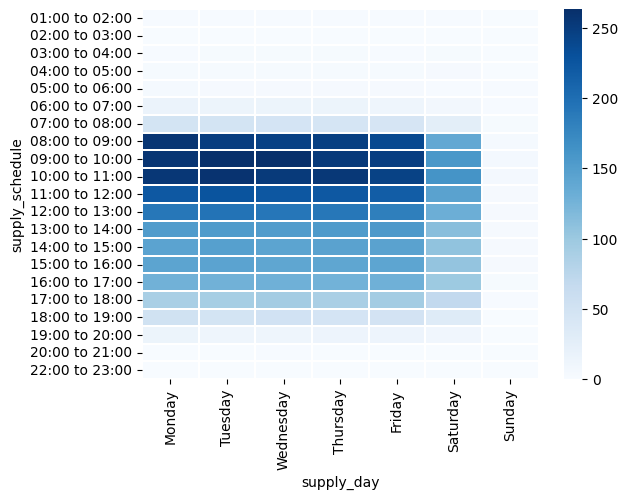

In [7]:
heatmap = temporal_analysis(df)

heatmap

In [8]:
########################## Type of Establishment vs Delivery Transportation Mode
def transportation_mode(df):

    # Keep relevant columns
    df = df[['economic_activity', 'supply_unloading', 'employees']]

    # Identify type of commerce
    est_types = ['Proveedor', 'Venta al detalle', 'Fabricante', 'Ventas por internet']
    df['est_type'] = df['economic_activity'].apply(lambda x: next((word for word in est_types if word.lower() in x.lower()), None))

    # Identify type of transportation mode
    transp_mode = ['camión', 'motocicleta', 'bicicleta', 'carreta', 'particular']
    df['transp_type'] = df['supply_unloading'].apply(lambda x: [word for word in transp_mode if word.lower() in x.lower()])
    
    # Explode transportation mode
    df = df.explode('transp_type').reset_index(drop=True)

    # Groupby to compute stacked bar plot
    df = df.groupby(['est_type', 'transp_type']).count().rename(columns={'employees': 'frequency'}).reset_index()
    df = df.pivot(index='est_type', columns='transp_type', values='frequency').fillna(0)
    df = df.div(df.sum(axis=1), axis=0)

    # Rename columns and indexes
    rename = {'Proveedor': 'Supplier', 'Venta al detalle': 'Retailer', 'Fabricante': 'Manufacturer', 'Ventas por internet': 'E-commerce'}
    df.rename(index=rename, inplace=True)

    rename1 = {'bicicleta': 'Bicycle', 'camión': 'Truck', 'carreta': 'Handcart', 'motocicleta': 'Motorcycle', 'particular': 'Private Vehicle'}
    df.rename(columns=rename1, inplace=True)

    return df

########################## Type of Establishment vs Unloading Location
def unloading_location(df):

    # Keep relevant columns
    df = df[['economic_activity', 'supply_unloading', 'employees']]

    # Identify type of commerce
    est_types = ['Proveedor', 'Venta al detalle', 'Fabricante', 'Ventas por internet']
    df['est_type'] = df['economic_activity'].apply(lambda x: next((word for word in est_types if word.lower() in x.lower()), None))

    # Identify how is the unloading
    unloading = ['sobre la vía', 'sobre el andén', 'bahía', 'internamente', 'vías aledañas', 'parqueadero']
    df['unloading_location'] = df['supply_unloading'].apply(lambda x: [word for word in unloading if word.lower() in x.lower()])

    # Explode unloading location
    df = df.explode('unloading_location').reset_index(drop=True)

    # Groupby to compute stacked bar plot
    df = df.groupby(['est_type', 'unloading_location']).count().rename(columns={'employees': 'frequency'}).reset_index()
    df = df.pivot(index='est_type', columns='unloading_location', values='frequency').fillna(0)
    df = df.div(df.sum(axis=1), axis=0)

    # Rename columns and indexes
    rename = {'Proveedor': 'Supplier', 'Venta al detalle': 'Retailer', 'Fabricante': 'Manufacturer', 'Ventas por internet': 'E-commerce'}
    df.rename(index=rename, inplace=True)

    rename1 = {'sobre la vía': 'On the road', 'sobre el andén': 'On the sidewalk', 'bahía': 'Loading/unloading zone',
               'internamente': 'Establishment facilities', 'vías aledañas': 'Nearby roads', 'parqueadero': 'Parking lot'}
    df.rename(columns=rename1, inplace=True)

    return df

########################## Type of Establishment vs Unloading Equipement
def unloading_equipement(df):

    # Keep relevant columns
    df = df[['economic_activity', 'warehouse_equipement', 'employees']]

    # Identify type of commerce
    est_types = ['Proveedor', 'Venta al detalle', 'Fabricante', 'Ventas por internet']
    df['est_type'] = df['economic_activity'].apply(lambda x: next((word for word in est_types if word.lower() in x.lower()), None))

    # Identify unloading equipement
    df['warehouse_equipement'] = df['warehouse_equipement'].str.strip()
    df['warehouse_equipement'] = df['warehouse_equipement'].str.replace(r".*ning.*", 'No', regex=True, case=False)

    # Explode warehouse equipement
    df['warehouse_equipement'] = df['warehouse_equipement'].str.split(',\s*')
    df = df.explode('warehouse_equipement')

    # Unify type of equipement
    to_unify = {'Caminata': 'Manual workforce', 'Na': 'No', '1': 'No', 'Camina': 'Manual workforce',
                'Parqueadero de uso interno': 'No', 'Al hombro': 'Manual workforce', 'Descargue a mano': 'Manual workforce',
                'no posee': 'No', 'Personal externo': 'Manual workforce', 'Parqueadero para clientes': 'No',
                'A mano': 'Manual workforce', 'La misma persona la carga en sus manos': 'Manual workforce',
                'No hay bodega': 'No', 'Las personas lo llevan cargados': 'Manual workforce',
                'No se requiere por el volumen': 'No', 'No aplica': 'No', 'No es necesario entra oaquete manual': 'No',
                'No se requiere lis paquetes vson pequeños sebtraen a mano': 'No', 'Caminando': 'Manual workforce',
                'Cajas': 'No', 'Carretilla entra': 'Carretilla', 'Bahía': 'No', np.nan: 'No', 'no': 'No',
                'Escaleras eléctricas': 'Other', 'Escalas': 'Other', 'Porta doble': 'Other', 'Montacargas': 'Loading Ramp',
                'Rampa mecánica': 'Loading Ramp', 'Gato hidráulico': 'Loading Ramp'}
    
    df['warehouse_equipement'] = df['warehouse_equipement'].replace(to_unify)

    

    # Groupby to compute stacked bar plot
    df = df.groupby(['est_type', 'warehouse_equipement']).count().rename(columns={'employees': 'frequency'}).reset_index()
    df = df.pivot(index='est_type', columns='warehouse_equipement', values='frequency').fillna(0)
    df = df.div(df.sum(axis=1), axis=0)

    # Rename columns and indexes
    rename = {'Proveedor': 'Supplier', 'Venta al detalle': 'Retailer', 'Fabricante': 'Manufacturer', 'Ventas por internet': 'E-commerce'}
    df.rename(index=rename, inplace=True)

    rename1 = {'Carretilla': 'Handcart', 'No': 'None', 'Elevador': 'Elevator',
                 'Rampa fija': 'Fixed Loading Ramp'}
    df.rename(columns=rename1, inplace=True)

    return df 

########################## Type of Establishment vs Supply frequency
def supply_frequency(df):

    # Keep relevant columns
    df = df[['economic_activity', 'supply_week', 'employees']]

    # Identify type of commerce
    est_types = ['Proveedor', 'Venta al detalle', 'Fabricante', 'Ventas por internet']
    df['est_type'] = df['economic_activity'].apply(lambda x: next((word for word in est_types if word.lower() in x.lower()), None))

    # Change names
    to_unify = {'La periodicidad es quincenal': 'Other', 'La periodicidad es mensual': 'Other'}
    df['supply_week'] = df['supply_week'].replace(to_unify)

    # Groupby to compute stacked bar plot
    df = df.groupby(['est_type', 'supply_week']).count().rename(columns={'employees': 'frequency'}).reset_index()
    df = df.pivot(index='est_type', columns='supply_week', values='frequency').fillna(0)
    df = df.div(df.sum(axis=1), axis=0)

    # Rename columns and indexes
    rename = {'Proveedor': 'Supplier', 'Venta al detalle': 'Retailer', 'Fabricante': 'Manufacturer', 'Ventas por internet': 'E-commerce'}
    df.rename(index=rename, inplace=True)

    rename1 = {5: '5 times a week', '6 o más': '6 times or more a week', '1 vez por semana': '1 time a week',
               2: '2 times a week', 3: '3 times a week', 4: '4 times a week'}
    df.rename(columns=rename1, inplace=True)

    df = df[['1 time a week', '2 times a week', '3 times a week',
             '4 times a week', '5 times a week', '6 times or more a week', 'Other']]

    return df

<>:79: SyntaxWarning: invalid escape sequence '\s'
<>:79: SyntaxWarning: invalid escape sequence '\s'
C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\667909170.py:79: SyntaxWarning: invalid escape sequence '\s'
  df['warehouse_equipement'] = df['warehouse_equipement'].str.split(',\s*')


In [17]:
df=transp_mode = transportation_mode(df)

df=unload_loca = unloading_location(df)

df=unload_equi = unloading_equipement(df)

df=supply_freq = supply_frequency(df)

df.to_csv(project_root / "data" / "intermediate" / "mario_clean.csv", index=False) 
print("Data saved to:", project_root / "data" / "intermediate" / "mario_clean.csv") 

C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\667909170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est_type'] = df['economic_activity'].apply(lambda x: next((word for word in est_types if word.lower() in x.lower()), None))
C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\667909170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transp_type'] = df['supply_unloading'].apply(lambda x: [word for word in transp_mode if word.lower() in x.lower()])
C:\Users\cgranadamunoz\

KeyError: "None of [Index(['economic_activity', 'supply_unloading', 'employees'], dtype='object', name='transp_type')] are in the [columns]"

In [9]:
############################### 

def plots_type_of_establishments(data_dict):

    sns.set_style("whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(18, 10))
    axes = axes.flatten()

    for ax, (title, content) in zip(axes, data_dict.items()):
    
        proportions = content['data']
        legend_title = content.get('legend_title')

        # Plot
        colors = sns.color_palette("Greys", n_colors=len(proportions.columns))
        bottom = pd.Series([0]*len(proportions), index=proportions.index)

        for i, col in enumerate(proportions.columns):
            ax.bar(
                proportions.index,
                proportions[col],
                bottom=bottom,
                label=col,
                color=colors[i]
            )
            bottom += proportions[col]

            # Format plot
        ax.set_title(title, fontsize=22)
        #ax.set_xlabel("Establishment Type", fontsize=12)
        #ax.set_ylabel("Proportion", fontsize=12)
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=14)
        ax.legend(title=legend_title, fontsize=14, title_fontsize=15, loc='upper right')

    fig.tight_layout()

    return fig

In [10]:
# Compute Stacked Bar Plots
transp_mode = transportation_mode(df)

unload_loca = unloading_location(df)

unload_equi = unloading_equipement(df)

supply_freq = supply_frequency(df)

# Data Dictionary
plot_dict = {'a) Supplier Transportation Mode': {'data': transp_mode, 'legend_title': 'Vehicle Type'},
             'b) Supplying Frequency': {'data': supply_freq, 'legend_title': 'Supply Frequency'},
             'c) Unloading Location': {'data': unload_loca, 'legend_title': 'Unloading Location'},
             'd) Unloading Equipment': {'data': unload_equi, 'legend_title': 'Unloading Equipment'}}

C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\667909170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est_type'] = df['economic_activity'].apply(lambda x: next((word for word in est_types if word.lower() in x.lower()), None))
C:\Users\cgranadamunoz\AppData\Local\Temp\ipykernel_16272\667909170.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transp_type'] = df['supply_unloading'].apply(lambda x: [word for word in transp_mode if word.lower() in x.lower()])
C:\Users\cgranadamunoz\

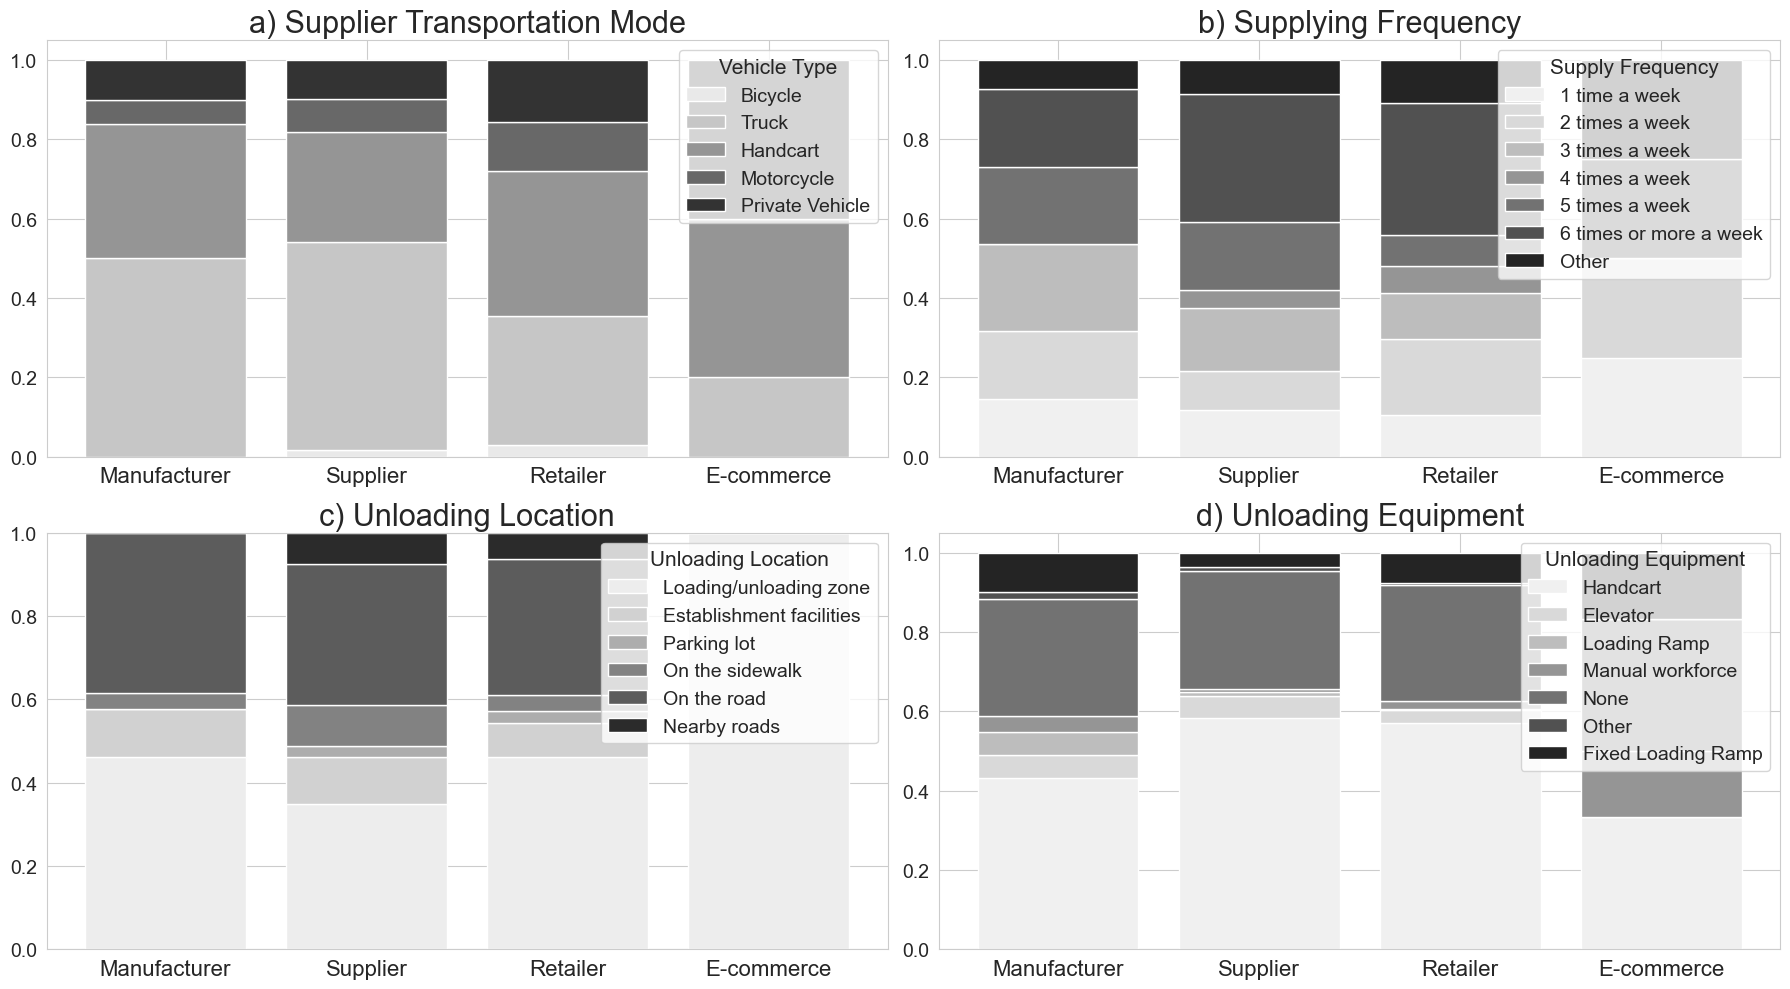

In [251]:
m = plots_type_of_establishments(plot_dict)

In [11]:
df['supply_unloading'].unique()

array(['En camión, estacionado en zona bahía y la ingresa la empresa transportadora, En carreta "zorrilla"',
       'En carreta "zorrilla"',
       'En camión, sobre la vía, En carreta "zorrilla"',
       'En camión, estacionado en zona bahía y la ingresa la empresa transportadora',
       'En camión, sobre la vía, En motocicleta',
       'En vehículo particular', 'En camión, se descarga internamente',
       'En camión, sobre la vía',
       'En camión, sobre la vía, En camión, sobre el andén',
       'En carreta "zorrilla", En vehículo particular', 'En motocicleta',
       'En camión, estacionado en bahía y la ingresa el personal de mi empresa, En carreta "zorrilla"',
       'En camión, estacionado en bahía y la ingresa el personal de mi empresa',
       'En camión, se descarga internamente, En motocicleta, En bicicleta, En carreta "zorrilla", En vehículo particular',
       'En camión, se descarga internamente, En motocicleta, En bicicleta, En carreta "zorrilla"',
       'En camión,

In [12]:
def warehouse_ownership(df):

    return

In [13]:
df['warehouse'].unique()

array(['Interno', 'No', 'Externo, propio', 'Externo, alquilado',
       'Externo, compartido con otros comercios'], dtype=object)

In [14]:
df['main_products'].unique()

array(['Cosméticos y productos de belleza', 'Calzado',
       'Reciclaje y residuos', 'Manufacturas', 'Mecánica',
       'Moda y textiles', 'Mensajería', 'Ferretería', 'Maderas',
       'Artículos para el hogar', 'Electrónica',
       'Juguetería y elementos deportivos',
       'Cacao, chocolate y confitería', 'Productos médicos y de salud',
       'Café', 'Restauración', 'Electrodomésticos', 'Papelería',
       'Productos alimenticios', 'Materiales de construcción',
       'Productos veterinarios y mascotas', 'Muebles de oficina',
       'Compraventa', 'Productos de aseo', 'Joyas',
       'Servicios financieros', 'Refrigeración', 'Maquinaria',
       'Servicios de telecomunicaciones', 'Productos cárnicos',
       'Arte y materiales para el arte', 'Bares y ocio',
       'Servicio de estacionamiento', 'Suministros'], dtype=object)

Plot a relative bar plot (Type of commerce vs Type of loading/Unloading tools; Type of commerce vs Main product)
Plot information regarding the warehouse
Plot the perception of safety regarding loading and unloading
Plot the frequency of supply